In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as sts

In [2]:
raw_csv_data=pd.read_csv(r'C:\Users\admin\Desktop\Index2018.csv')

In [3]:
df_comp=raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

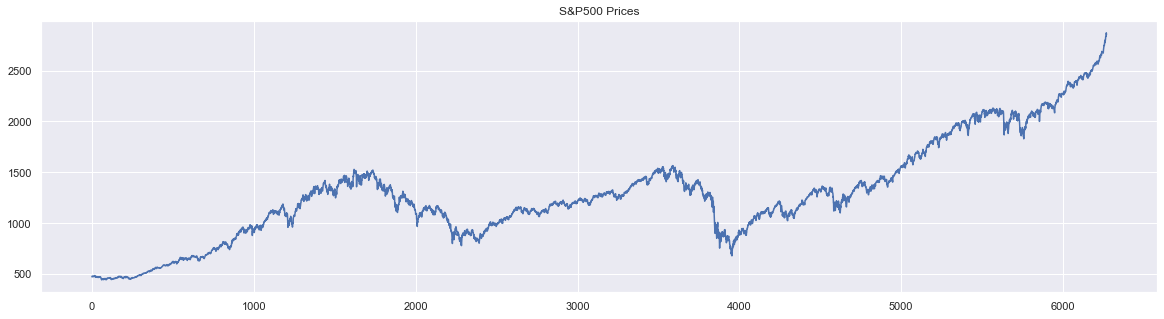

In [7]:
df_comp.spx.plot(figsize=(20,5),title='S&P500 Prices')

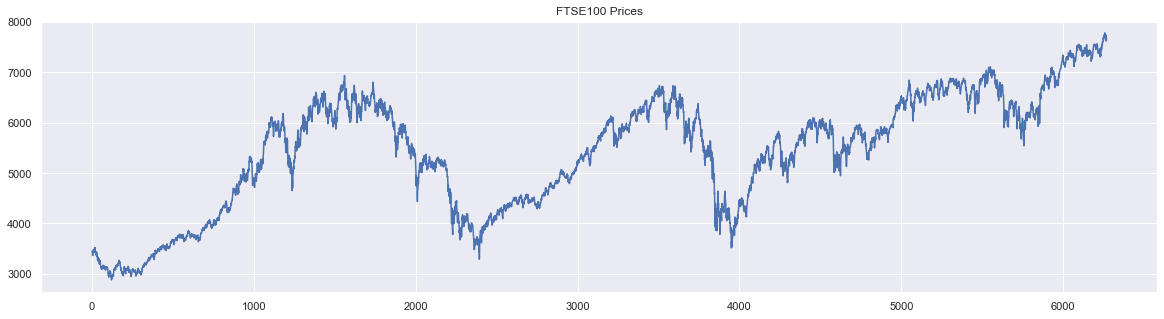

In [8]:
df_comp.ftse.plot(figsize=(20,5),title='FTSE100 Prices')

Text(0.5, 1.0, 'S&P vs FTSE')

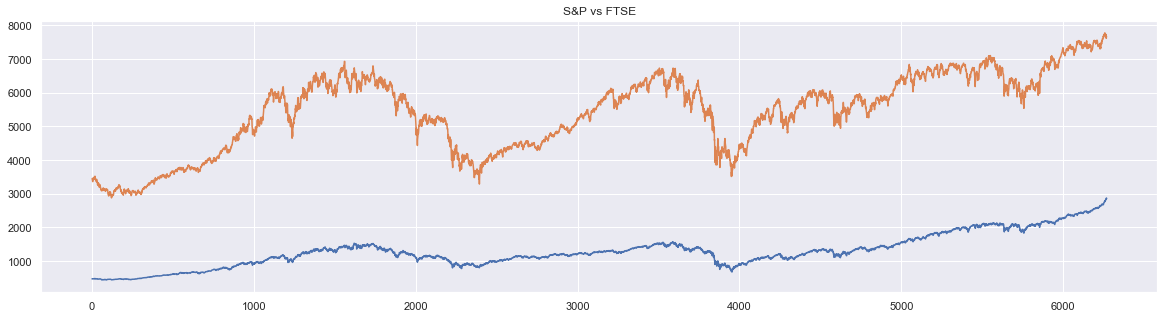

In [9]:
df_comp.spx.plot(figsize=(20,5),title='S&P500 Prices')
df_comp.ftse.plot(figsize=(20,5),title='FTSE100 Prices')
plt.title('S&P vs FTSE')

# The QQ Plot

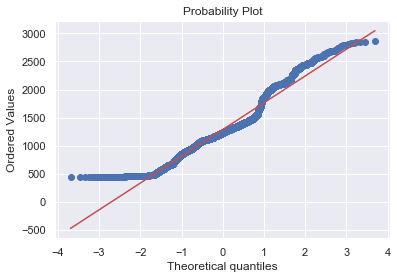

In [10]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

In [11]:
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)

In [12]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [13]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [14]:
df_comp.set_index('date',inplace=True)

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp=df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df_comp=df_comp.fillna(method='ffill')

In [19]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [20]:
df_comp['market_value']=df_comp.spx

In [21]:
del df_comp['spx'],df_comp['dax'],df_comp['nikkei'],df_comp['ftse']

In [22]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting the data

In [23]:
size=int(len(df_comp)*0.8)

In [24]:
df=df_comp.iloc[:size]
df_test=df_comp.iloc[size:]

# White Noise

In [25]:
wn=np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))

In [26]:
df['wn']=wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,891.984641
1994-01-10,475.27,1225.286427
1994-01-11,474.13,1310.037427
1994-01-12,474.17,1232.118076
1994-01-13,472.47,996.951426


Text(0.5, 1.0, 'White Noise Time Series')

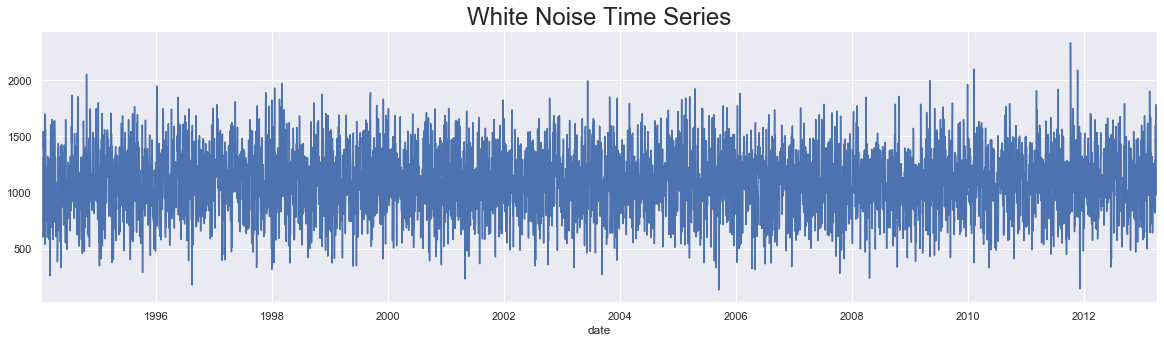

In [28]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time Series',size=24)

(0, 2300)

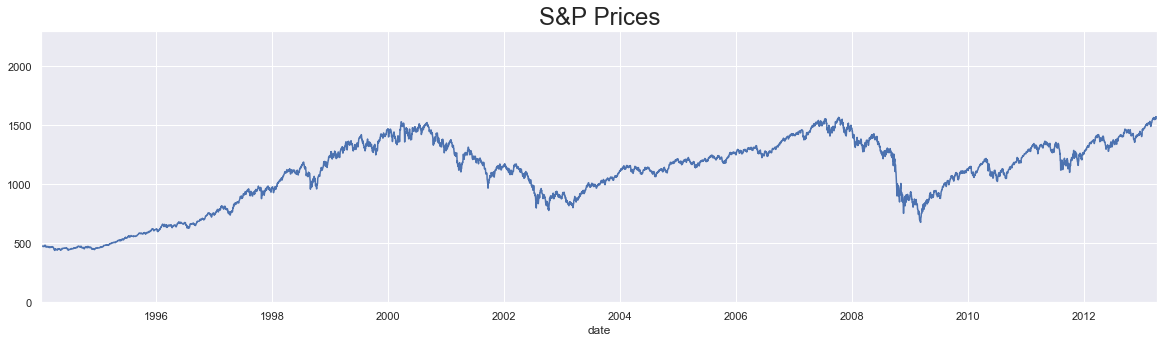

In [29]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices',size=24)
plt.ylim(0,2300)

# Random Walk

In [30]:
rw=pd.read_csv(r'C:\Users\admin\Desktop\RandWalk.csv')

In [31]:
rw.date=pd.to_datetime(rw.date,dayfirst=True)

In [32]:
rw.set_index('date',inplace=True)

In [33]:
rw=rw.asfreq('b')

In [51]:
rw.isna().sum()

price    0
dtype: int64

In [34]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [35]:
df['rw']=rw.price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,891.984641,1122.139662
1994-01-10,475.27,1225.286427,1080.347860
1994-01-11,474.13,1310.037427,1082.095245
1994-01-12,474.17,1232.118076,1083.639265
1994-01-13,472.47,996.951426,1067.146255


Text(0.5, 1.0, 'Random Walk')

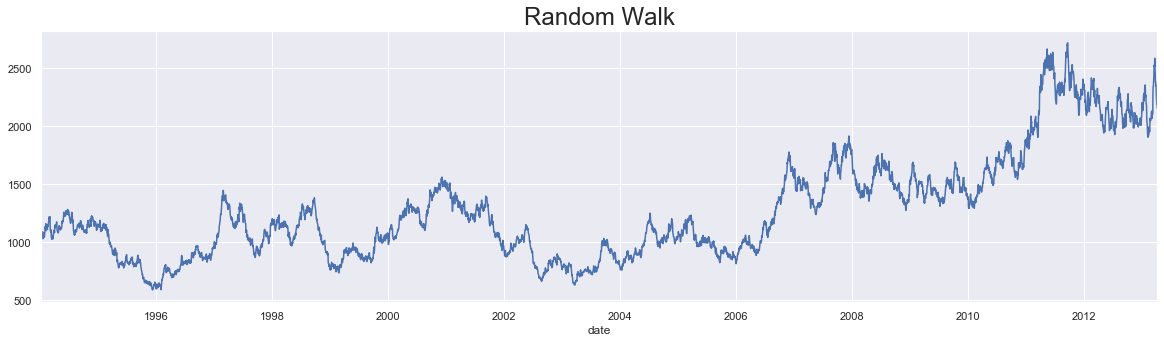

In [37]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=24)

Text(0.5, 1.0, 'Random Walk vs S&P')

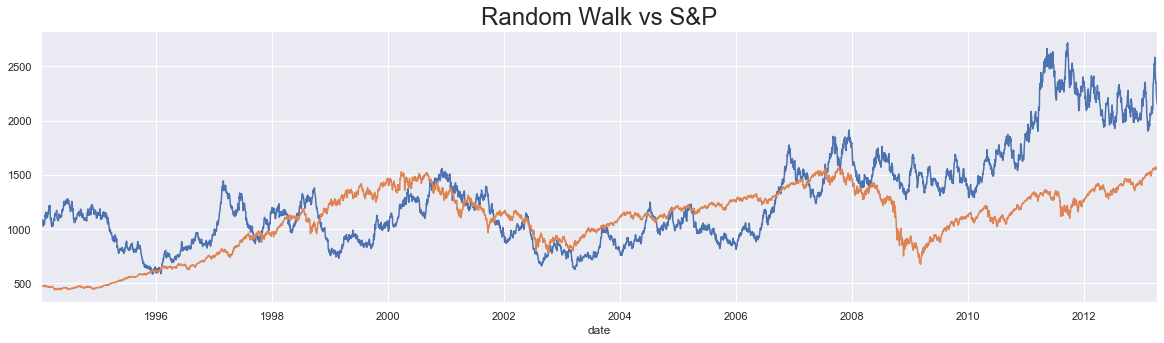

In [38]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P",size=24)

# Stationarity

In [39]:
sts.adfuller(df.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [40]:
sts.adfuller(df.wn)

(-68.11472530135234,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70798.68010187925)

In [41]:
sts.adfuller(df.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Seasonality

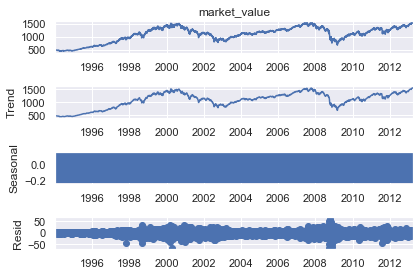

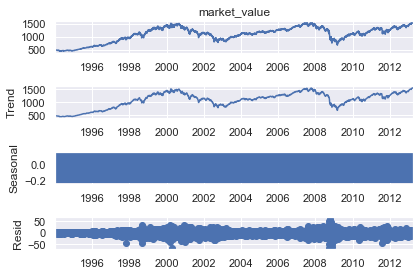

In [42]:
s_dec_additive=seasonal_decompose(df.market_value,model='additive')
s_dec_additive.plot()

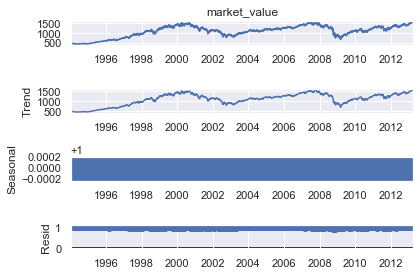

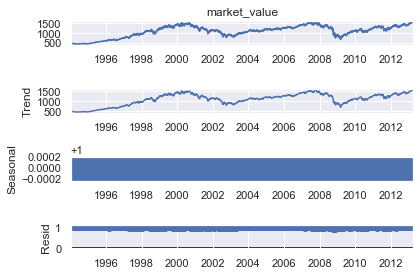

In [43]:
s_dec_multiplicative=seasonal_decompose(df.market_value,model='multiplicative')
s_dec_multiplicative.plot()

# ACF

Text(0.5, 1.0, 'ACF S&P')

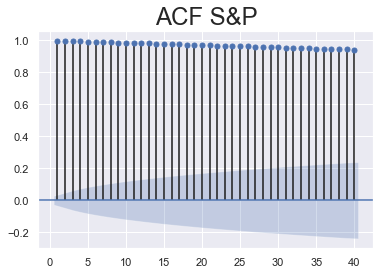

In [44]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title('ACF S&P',size=24)

Text(0.5, 1.0, 'ACF White Noise')

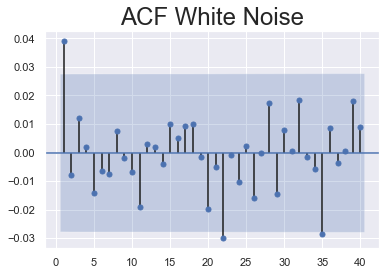

In [45]:
sgt.plot_acf(df.wn,lags=40,zero=False)
plt.title('ACF White Noise',size=24)

Text(0.5, 1.0, 'ACF Random Walk')

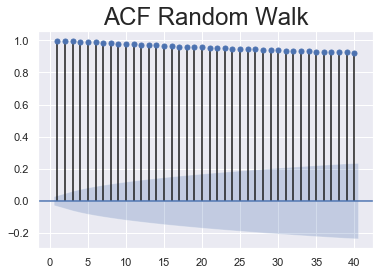

In [47]:
sgt.plot_acf(df.rw,lags=40,zero=False)
plt.title('ACF Random Walk',size=24)

# PACF

Text(0.5, 1.0, 'PACF S&P')

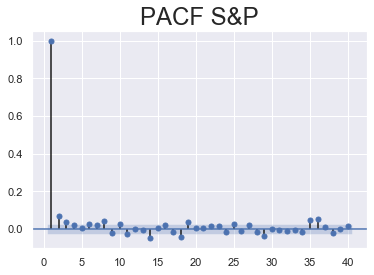

In [48]:
sgt.plot_pacf(df.market_value,lags=40,zero=False,method=('ols'))
plt.title('PACF S&P',size=24)

Text(0.5, 1.0, 'PACF WN')

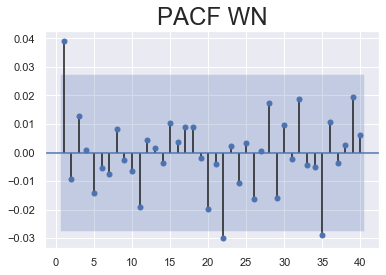

In [49]:
sgt.plot_pacf(df.wn,lags=40,zero=False,method=('ols'))
plt.title('PACF WN',size=24)

Text(0.5, 1.0, 'PACF RW')

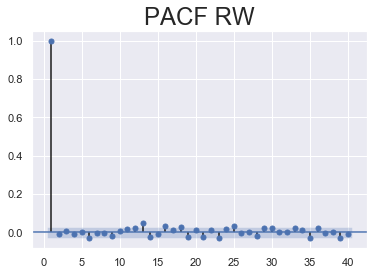

In [50]:
sgt.plot_pacf(df.rw,lags=40,zero=False,method=('ols'))
plt.title('PACF RW',size=24)